# Patient Clustering Project

### Contents:

#### 1- Understanding the data
#### 2- Cleaning 
#### 3- Null value processing
#### 4- Encoding
#### 5- Normalization (standart scaling and min-max scaling)
#### 6- Dimension Reductioning (PCA)
#### 7- Modelling (KMeans - Hierarchical - DBSCAN Clustering)
#### 8- Model Optimizing
#### 9- Model Conclusions
#### 10- Clustering Results in DataFrame

### Variables Abbreviation List:

###### df_nn : dataframe with no Null value
###### X_mm  : min max scaled data
###### X_std : standart scaled data
###### X_pca_std : dimension reductioned and standart scaled data. (like: X_pca_mm)
###### kmeans_mm : Kmeans clustering model with min max scaled data. (like: kmeans_std)
###### agglo_ward_std : Hierachical clustering model with parameter(ward linkage) and standart scaled data. (like: agglo_single_mm, agglo_avg_mm...)
###### dbscan_std : DBSCAN clustering model with standart scaled data. (like: dbscan_mm)

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [16]:
data = pd.read_csv("patient_dataset.csv")

df = data.copy()

df.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker


# Understanding - Cleaning - Preprocessing

In [17]:
print(" 5 özellikte null değer var..\n")
print(" Gender(0,1), plasma_glucose(regression), skin_thickness(regression), insulin(regression), residence_type(Urban,Rural)\n")
df.info()


 5 özellikte null değer var..

 Gender(0,1), plasma_glucose(regression), skin_thickness(regression), insulin(regression), residence_type(Urban,Rural)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             5528 non-null   float64
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   plasma_glucose     5391 non-null   float64
 8   skin_thickness     5386 non-null   float64
 9   insulin            5432 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   int64  
 13  heart_disease    

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,6000.0,53.657833,21.018382,18.000000,36.000000,53.000000,72.000000,90.000000
gender,5528.0,0.497648,0.500040,0.000000,0.000000,0.000000,1.000000,1.000000
chest_pain_type,6000.0,2.518500,1.124071,1.000000,2.000000,3.000000,4.000000,4.000000
blood_pressure,6000.0,134.277167,48.303001,0.000000,109.000000,135.000000,161.000000,300.000000
cholesterol,6000.0,209.844667,52.840432,120.000000,164.000000,210.000000,257.000000,300.000000
max_heart_rate,6000.0,144.996000,43.583318,70.000000,108.000000,144.000000,183.000000,220.000000
exercise_angina,6000.0,0.503167,0.500032,0.000000,0.000000,1.000000,1.000000,1.000000
plasma_glucose,5391.0,161.119644,52.434693,70.000000,116.000000,162.000000,206.000000,250.000000
skin_thickness,5386.0,59.964723,23.264030,20.000000,40.000000,60.000000,80.000000,100.000000
insulin,5432.0,129.601252,29.207479,80.000000,105.000000,129.000000,155.000000,180.000000


In [20]:
df.dtypes

age                    int64
gender               float64
chest_pain_type        int64
blood_pressure         int64
cholesterol            int64
max_heart_rate         int64
exercise_angina        int64
plasma_glucose       float64
skin_thickness       float64
insulin              float64
bmi                  float64
diabetes_pedigree    float64
hypertension           int64
heart_disease          int64
residence_type        object
smoking_status        object
dtype: object

### Encoding

In [21]:
print("residenc_type, smoking_status için label encoding")


le = LabelEncoder()

df["smoking_status"] = le.fit_transform(df["smoking_status"])


def map_residence_type(value):
    if value == 'Urban':
        return 1
    elif value == 'Rural':
        return 0
    else:
        return value  

df['residence_type'] = df['residence_type'].apply(map_residence_type)

df["residence_type"]


df.info()

residenc_type, smoking_status için label encoding
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             5528 non-null   float64
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   plasma_glucose     5391 non-null   float64
 8   skin_thickness     5386 non-null   float64
 9   insulin            5432 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   int64  
 13  heart_disease      6000 non-null   int64  
 14  residence_type     5545 non-null   float64
 15  smoking_status     600

In [22]:
df

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,1.0,1
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,1.0,2
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,0.0,0
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,0.0,1
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,0.0,0
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,1.0,0
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,1.0,0
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,1.0,0


## Null values processing

### Filling Null values with XGBoost algorithm

#### Null columns:

#### gender(0,1), residence_type(0,1), plasma_glucose(regression), skin_thickness(regression), insulin(regression)


In [19]:
df["residence_type"].unique()

array(['Urban', 'Rural', nan], dtype=object)

In [23]:
# for Regression columns

data=df.drop(["gender","residence_type"], axis=1)
# null değer bulunan kolon isimleri:
columns_with_nulls = data.columns[data.isnull().any()].tolist()


for column in columns_with_nulls:
    # null değer bulunan kolonların null değer bulunmayan satırlarını almak (eğitim verisi)
    train_data = data[data[column].notnull()]
    # 
    X_train = train_data.drop(columns_with_nulls, axis=1)
    y_train = train_data[column]

    # tahmin yapılacak kolonun null değer içeren satırlarını almak
    test_data = data[data[column].isnull()]
    # tahmin yapılacak kolonun null değer içeren satırlarından  null değer içeren diğer kolonları sil
    X_test = test_data.drop(columns_with_nulls, axis=1)

    # xgb ile missing value ları tahmin edip doldur
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    data.loc[data[column].isnull(), column] = xgb.predict(X_test)




#################################################
#################################################


# forclassification columns

df_combined = pd.concat([df[['gender', 'residence_type']], data], axis=1)

data = df_combined
columns_with_nulls = data.columns[data.isnull().any()].tolist()


for column in columns_with_nulls:
    train_data = data[data[column].notnull()]
    # 
    X_train = train_data.drop(columns_with_nulls, axis=1)
    y_train = train_data[column]

    test_data = data[data[column].isnull()]
    X_test = test_data.drop(columns_with_nulls, axis=1)

    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    data.loc[data[column].isnull(), column] = xgb.predict(X_test)


df_nn = data

In [24]:
df_nn.isnull().sum()

gender               0
residence_type       0
age                  0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
smoking_status       0
dtype: int64

In [78]:
print(" All Null values are filled with XGBoost\n")

df_nn.info()

 All Null values are filled with XGBoost

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             6000 non-null   float64
 1   residence_type     6000 non-null   float64
 2   age                6000 non-null   int64  
 3   chest_pain_type    6000 non-null   int64  
 4   blood_pressure     6000 non-null   int64  
 5   cholesterol        6000 non-null   int64  
 6   max_heart_rate     6000 non-null   int64  
 7   exercise_angina    6000 non-null   int64  
 8   plasma_glucose     6000 non-null   float64
 9   skin_thickness     6000 non-null   float64
 10  insulin            6000 non-null   float64
 11  bmi                6000 non-null   float64
 12  diabetes_pedigree  6000 non-null   float64
 13  hypertension       6000 non-null   int64  
 14  heart_disease      6000 non-null   int64  
 15  smoking_status     6000 non-nu

<Axes: >

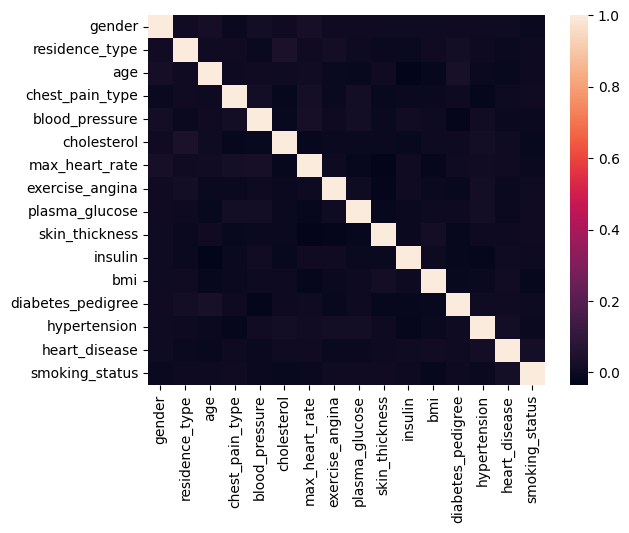

In [26]:
sns.heatmap(df_nn.corr())

### Outliar analysis...

## ...

### Scaling

In [27]:
std = StandardScaler()
mm = MinMaxScaler()

df_std = std.fit_transform(df_nn)
df_mm = mm.fit_transform(df_nn)

### Dimension Reductioning (PCA)

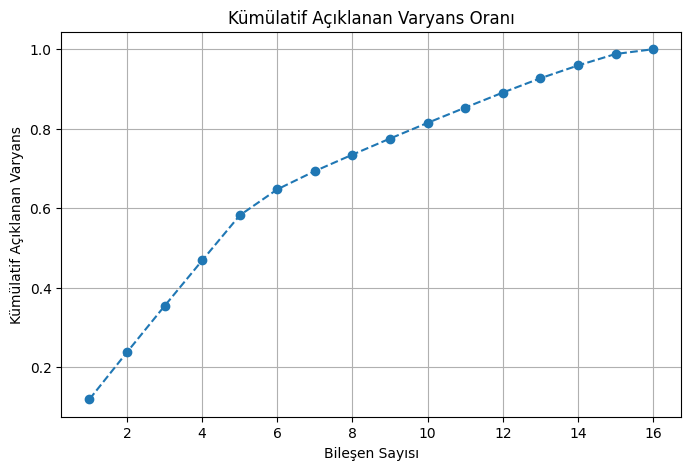

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=None)
X_pca = pca.fit_transform(df_mm)

explained_variance = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Kümülatif Açıklanan Varyans Oranı')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Kümülatif Açıklanan Varyans')
plt.grid()
plt.show()


In [29]:
cumulative_explained_variance

array([0.11995034, 0.23828258, 0.35455752, 0.4689284 , 0.5823251 ,
       0.64770897, 0.69361239, 0.73498943, 0.77540785, 0.81486212,
       0.853193  , 0.8909319 , 0.92699673, 0.95909166, 0.98798097,
       1.        ])

In [30]:
pca = PCA(n_components=2)
X_pca_mm = pca.fit_transform(df_mm)
explained_variance = pca.explained_variance_ratio_
print("Summary of the explaining variance for Min-max-scaled data:", sum(explained_variance))



Min max scaler için Açıklanan toplam varyans: 0.2382825795363629


In [31]:
from sklearn.decomposition import PCA

n_components = 2  
pca = PCA(n_components=n_components)
X_pca_std = pca.fit_transform(df_std)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

print(f"for Standart scaling - {n_components} components - explained variance ratio: {cumulative_explained_variance[-1]}")

Standart scaler için Seçilen 2 bileşenle açıklanan toplam varyans oranı: 0.13519483465712845


# Modelling

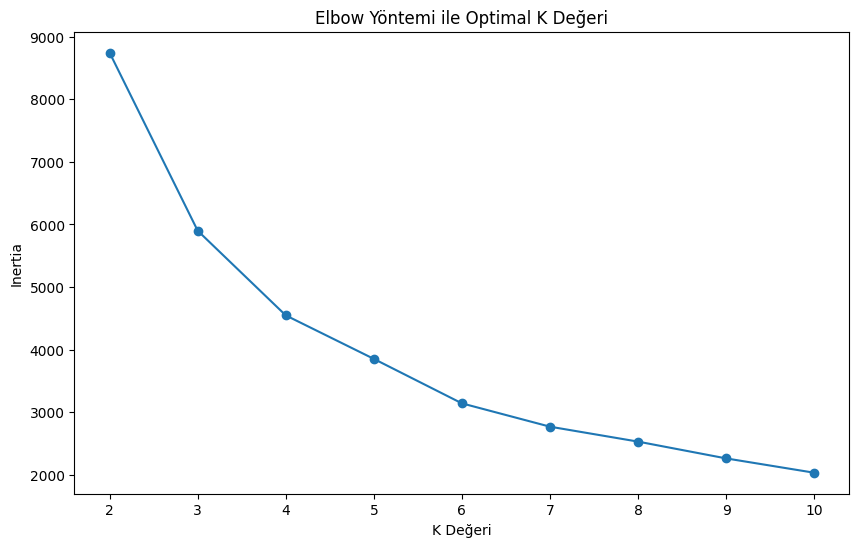

In [ ]:
k_range = range(2, 11)
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_std)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('optimal K value with Elbow Method')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.show()

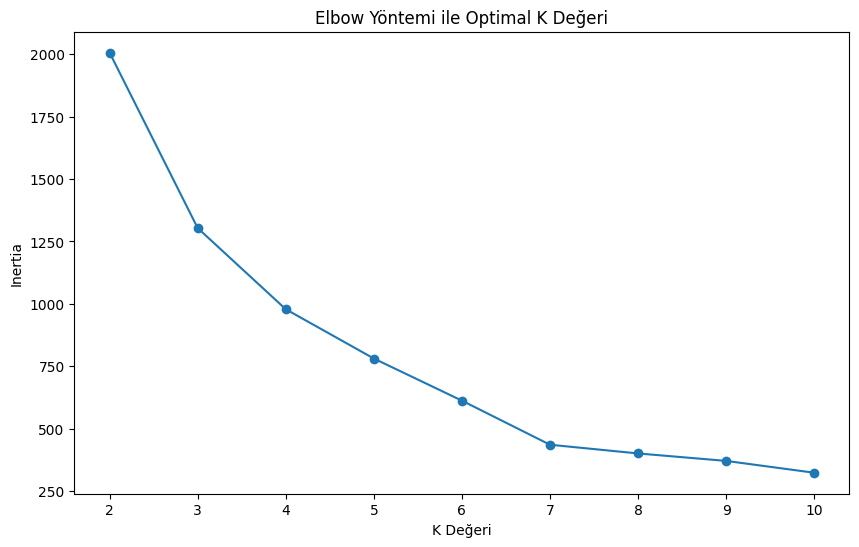

In [ ]:
k_range = range(2, 11)
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_mm)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('optimal K value with Elbow Method')
plt.xlabel('K value')
plt.ylabel('Inertia')
plt.show()

##### there is not a optimal K 
##### because of data too dense
##### I accepted K value as 3

## K-means Clustering

In [36]:
k = 3

kmeans_std = KMeans(n_clusters = k, n_init=1, init = 'random', max_iter=50).fit(X_pca_std)
kmeans_mm = KMeans(n_clusters = k, n_init=1, init = 'random', max_iter=50).fit(X_pca_mm)


labels_kmeans_std = kmeans_std.labels_
labels_kmeans_mm = kmeans_mm.labels_


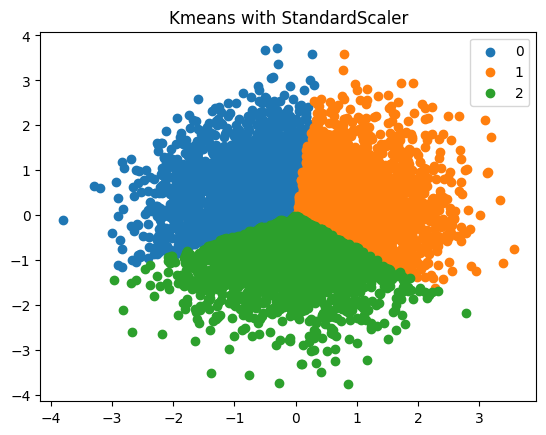

Inertia Kmeans with StandardScaler: 5899.51084662334
Silhouette_score Kmeans with StandardScaler: 0.3303449916507071
Davies_bouldin_score Kmeans with StandardScaler: 0.9387563743492507


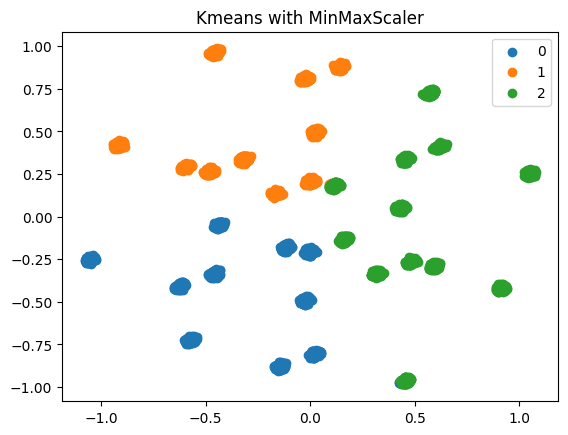

Inertia Kmeans with MinMaxScaler: 5899.51084662334
Silhouette_score Kmeans with MinMaxScaler: 0.37897229635116764
Davies_bouldin_score Kmeans with MinMaxScaler: 0.8972920791901408


In [ ]:

kmeans_results = {}

def plot_kmeans(X, labels, title, kmeans_results, key):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=label)
    plt.legend()
    plt.title(title)
    plt.show()
    
    inertia = kmeans_std.inertia_
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)

    print(f"Inertia {title}: {inertia}")
    print(f"Silhouette_score {title}: {silhouette}")
    print(f"Davies_bouldin_score {title}: {davies_bouldin}")

    kmeans_results[key] = {'silhouette_score': silhouette, 'davies_bouldin_score': davies_bouldin}




# for StandardScaler 
plot_kmeans(
    X_pca_std, 
    labels_kmeans_std, 
    'Kmeans with StandardScaler',
    kmeans_results,
    'kmeans_std')
    

# for MinMaxScaler 
plot_kmeans(
    X_pca_mm, 
    labels_kmeans_mm, 
    'Kmeans with MinMaxScaler',
    kmeans_results,
    'kmeans_mm')


##### best score for kmeans with min max scaler:  0.37

##### because of the low davies_bouldin_score and high silhouette score

## Hierarchical Clustering

In [76]:
agglo_single_std = AgglomerativeClustering(linkage='single',n_clusters=3).fit(X_pca_std)
agglo_avg_std = AgglomerativeClustering(linkage='average',n_clusters=3).fit(X_pca_std)
agglo_ward_std = AgglomerativeClustering(linkage='ward',n_clusters=3).fit(X_pca_std)
agglo_single_mm = AgglomerativeClustering(linkage='single',n_clusters=3).fit(X_pca_mm)
agglo_avg_mm = AgglomerativeClustering(linkage='average',n_clusters=3).fit(X_pca_mm)
agglo_ward_mm = AgglomerativeClustering(linkage='ward',n_clusters=3).fit(X_pca_mm)




labels_agglo_single_std = agglo_single_std.labels_
labels_agglo_avg_std = agglo_avg_std.labels_
labels_agglo_ward_std = agglo_ward_std.labels_
labels_agglo_single_mm = agglo_single_mm.labels_
labels_agglo_avg_mm = agglo_avg_mm.labels_
labels_agglo_ward_mm = agglo_ward_mm.labels_

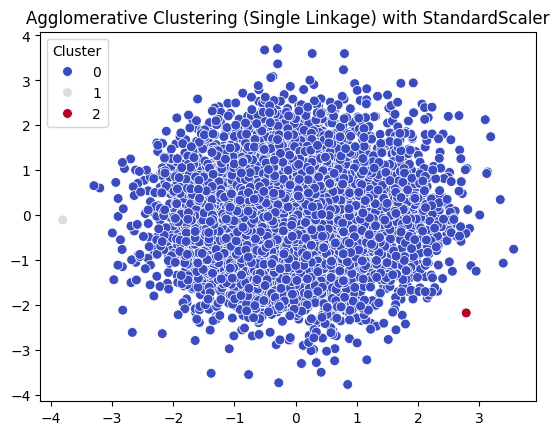

Silhouette_score Agglomerative Clustering (Single Linkage) with StandardScaler: 0.35510719496092363
Davies_bouldin_score Agglomerative Clustering (Single Linkage) with StandardScaler: 0.3626527465984759


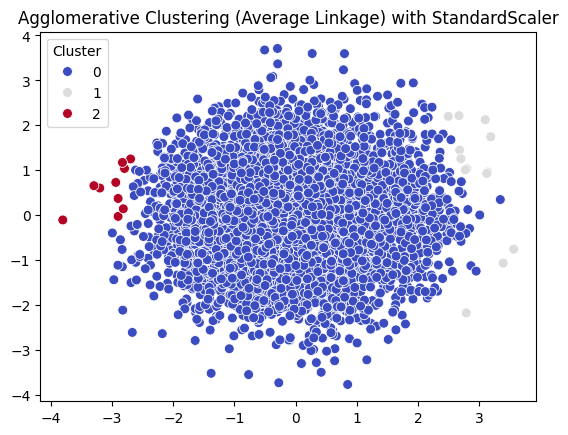

Silhouette_score Agglomerative Clustering (Average Linkage) with StandardScaler: 0.2736870877406054
Davies_bouldin_score Agglomerative Clustering (Average Linkage) with StandardScaler: 0.7092274344971656


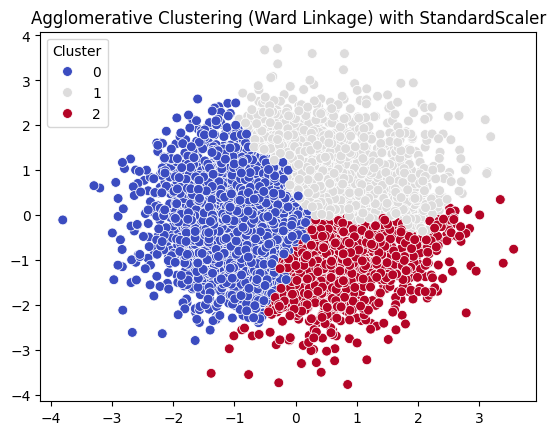

Silhouette_score Agglomerative Clustering (Ward Linkage) with StandardScaler: 0.31519982505148814
Davies_bouldin_score Agglomerative Clustering (Ward Linkage) with StandardScaler: 0.9648170479802295


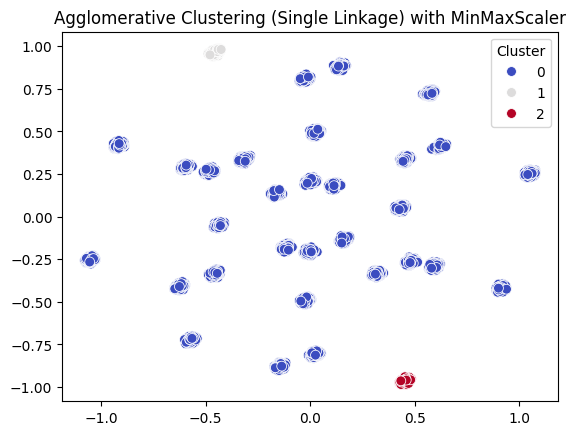

Silhouette_score Agglomerative Clustering (Single Linkage) with MinMaxScaler: 0.05274992132514303
Davies_bouldin_score Agglomerative Clustering (Single Linkage) with MinMaxScaler: 0.6022284677186086


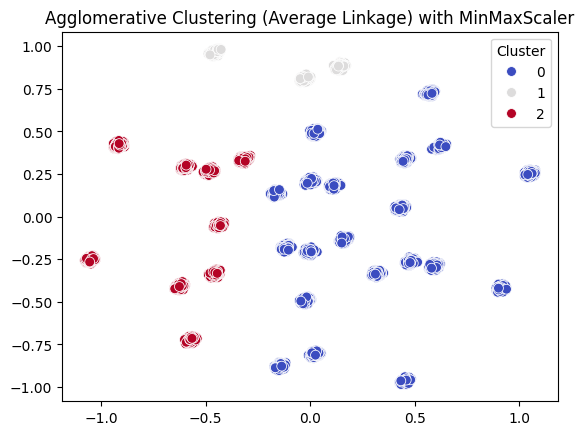

Silhouette_score Agglomerative Clustering (Average Linkage) with MinMaxScaler: 0.31506929502948294
Davies_bouldin_score Agglomerative Clustering (Average Linkage) with MinMaxScaler: 0.9268142152207618


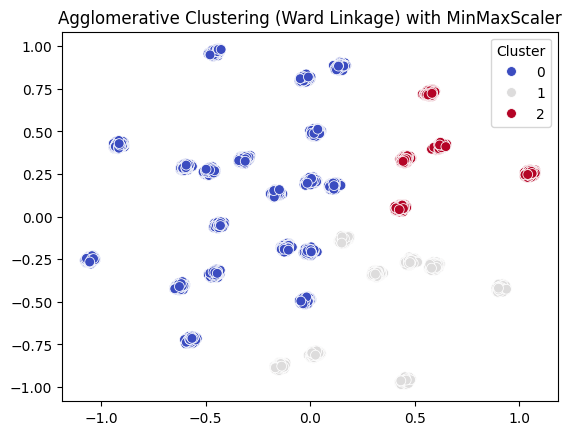

Silhouette_score Agglomerative Clustering (Ward Linkage) with MinMaxScaler: 0.2960498648445995
Davies_bouldin_score Agglomerative Clustering (Ward Linkage) with MinMaxScaler: 0.9587183201651044


In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Sonuçları kaydetmek için bir sözlük oluşturun
hierarchical_results = {}

# Hiyerarşik kümeleme fonksiyonu
def plot_hierarchical(X, labels, title, hierarchical_results, key):
    unique_labels = np.unique(labels)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='coolwarm', s=50)
    plt.legend(title='Cluster')
    plt.title(title)
    plt.show()

    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)

    print(f"Silhouette_score {title}: {silhouette}")
    print(f"Davies_bouldin_score {title}: {davies_bouldin}")
    
    # Sonuçları sözlüğe kaydet
    hierarchical_results[key] = {'silhouette_score': silhouette, 'davies_bouldin_score': davies_bouldin}

# Agglomerative Clustering using StandardScaler
plot_hierarchical(X_pca_std, labels_agglo_single_std, 'Agglomerative Clustering (Single Linkage) with StandardScaler', hierarchical_results, 'hierarchical_single_std')
plot_hierarchical(X_pca_std, labels_agglo_avg_std, 'Agglomerative Clustering (Average Linkage) with StandardScaler', hierarchical_results, 'hierarchical_average_std')
plot_hierarchical(X_pca_std, labels_agglo_ward_std, 'Agglomerative Clustering (Ward Linkage) with StandardScaler', hierarchical_results, 'hierarchical_ward_std')

# Agglomerative Clustering using MinMaxScaler
plot_hierarchical(X_pca_mm, labels_agglo_single_mm, 'Agglomerative Clustering (Single Linkage) with MinMaxScaler', hierarchical_results, 'hierarchical_single_mm')
plot_hierarchical(X_pca_mm, labels_agglo_avg_mm, 'Agglomerative Clustering (Average Linkage) with MinMaxScaler', hierarchical_results, 'hierarchical_average_mm')
plot_hierarchical(X_pca_mm, labels_agglo_ward_mm, 'Agglomerative Clustering (Ward Linkage) with MinMaxScaler', hierarchical_results, 'hierarchical_ward_mm')



##### best score for hierarchical clustering with using single linkage and standart scaler: 0.35

##### because of the low davies_bouldin_score and high silhouette score

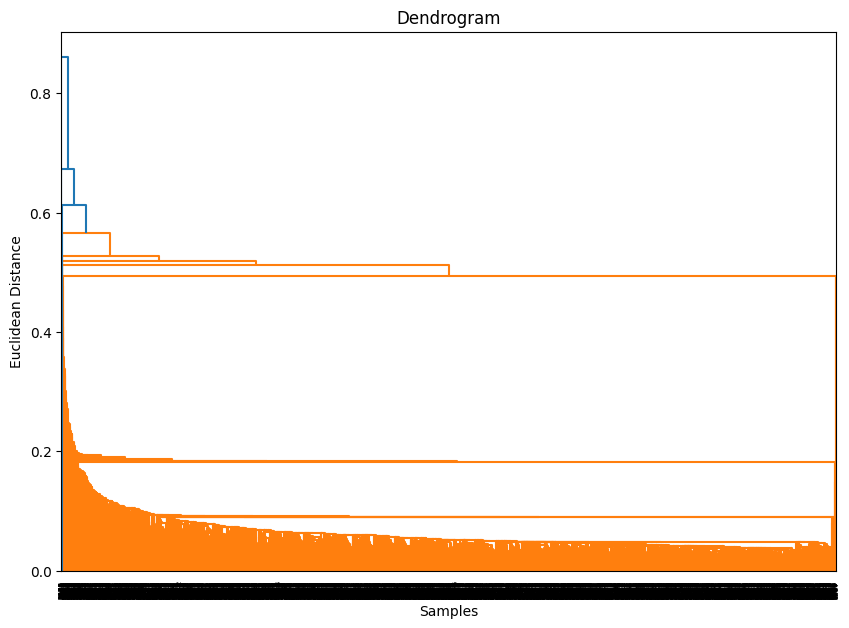

In [ ]:
plt.figure(figsize=(10, 7))
linkage_matrix = sch.linkage(X_pca_std, method='single')
sch.dendrogram(linkage_matrix)
plt.title("Dendrogram for 'single linkage' and 'standart scaler'")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# DBSCAN Clustering

In [73]:
dbscan_std = DBSCAN(eps=0.3, min_samples=3).fit(X_pca_std)
dbscan_mm = DBSCAN(eps=0.1, min_samples=3).fit(X_pca_mm)


labels_dbscan_std = dbscan_std.labels_
labels_dbscan_mm = dbscan_mm.labels_

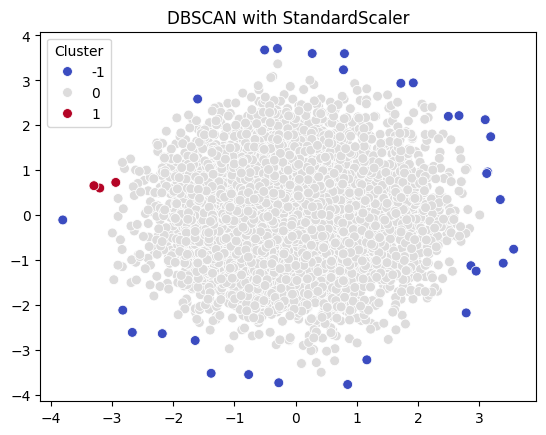

Silhouette_score DBSCAN with StandardScaler: 0.35981279691751344
Davies_bouldin_score DBSCAN with StandardScaler: 3.8119270476040703


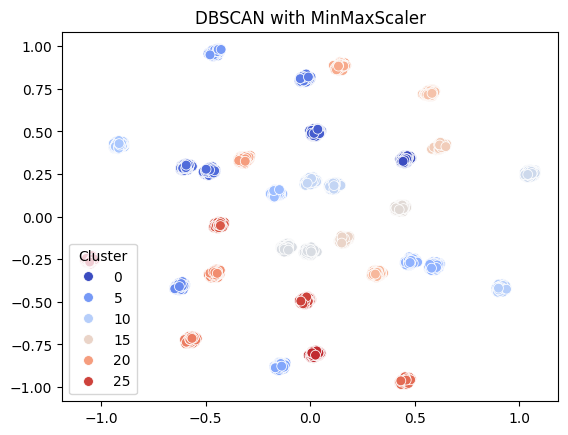

Silhouette_score DBSCAN with MinMaxScaler: 0.8632141983982302
Davies_bouldin_score DBSCAN with MinMaxScaler: 0.2052211747285082


In [74]:


# Sonuçları kaydetmek için bir sözlük oluşturun
dbscan_results = {}

# DBSCAN kümeleme fonksiyonu
def plot_dbscan(X, labels, title, dbscan_results, key):
    unique_labels = np.unique(labels)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='coolwarm', s=50)
    plt.legend(title='Cluster')
    plt.title(title)
    plt.show()

    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)

    print(f"Silhouette_score {title}: {silhouette}")
    print(f"Davies_bouldin_score {title}: {davies_bouldin}")
    
    # Sonuçları sözlüğe kaydet
    dbscan_results[key] = {'silhouette_score': silhouette, 'davies_bouldin_score': davies_bouldin}




plot_dbscan(X_pca_std, labels_dbscan_std, 'DBSCAN with StandardScaler', dbscan_results, 'dbscan_std')

plot_dbscan(X_pca_mm, labels_dbscan_mm, 'DBSCAN with MinMaxScaler', dbscan_results, 'dbscan_mm')




##### best DBSCAN score with min-max-scaler 
##### but it created 25 classes
##### so I will make "parameter optimization" and "outliar analysis"

### DBSCAN parameter optimization with grid search

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

# Özelleştirilmiş skorlama fonksiyonları oluştur
def dbscan_silhouette_score(X, labels):
    mask = labels != -1
    return silhouette_score(X[mask], labels[mask]) if len(set(labels[mask])) > 1 else -1

# Grid Search uygulama
def dbscan_grid_search(X, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        model = DBSCAN(**params).fit(X)
        score = dbscan_silhouette_score(X, model.labels_)
        if score > best_score:
            best_score = score
            best_params = params
    return best_params, best_score

# Grid Search için parametre aralıkları belirle
param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.4, 0.5],
    'min_samples': [3, 5, 7, 10]
}

# StandardScaler kullanarak parametre optimizasyonu
best_params_std, best_score_std = dbscan_grid_search(X_pca_std, param_grid)
print("Best parameters for StandardScaler DBSCAN:", best_params_std)
print("Best silhouette score for StandardScaler DBSCAN:", best_score_std)

# MinMaxScaler kullanarak parametre optimizasyonu
best_params_mm, best_score_mm = dbscan_grid_search(X_pca_mm, param_grid)
print("Best parameters for MinMaxScaler DBSCAN:", best_params_mm)
print("Best silhouette score for MinMaxScaler DBSCAN:", best_score_mm)


Best parameters for StandardScaler DBSCAN: {'eps': 0.3, 'min_samples': 3}
Best silhouette score for StandardScaler DBSCAN: 0.40960543632317037
Best parameters for MinMaxScaler DBSCAN: {'eps': 0.1, 'min_samples': 3}
Best silhouette score for MinMaxScaler DBSCAN: 0.8632141983982302


### Outliar analysis...

## ...

## Results for clustering models scores

                          silhouette_score  davies_bouldin_score
dbscan_std                        0.359813              3.811927
dbscan_mm                         0.863214              0.205221
hierarchical_single_std           0.355107              0.362653
hierarchical_average_std          0.273687              0.709227
hierarchical_ward_std             0.315200              0.964817
hierarchical_single_mm            0.052750              0.602228
hierarchical_average_mm           0.315069              0.926814
hierarchical_ward_mm              0.296050              0.958718
kmeans_std                        0.330345              0.938756
kmeans_mm                         0.378972              0.897292


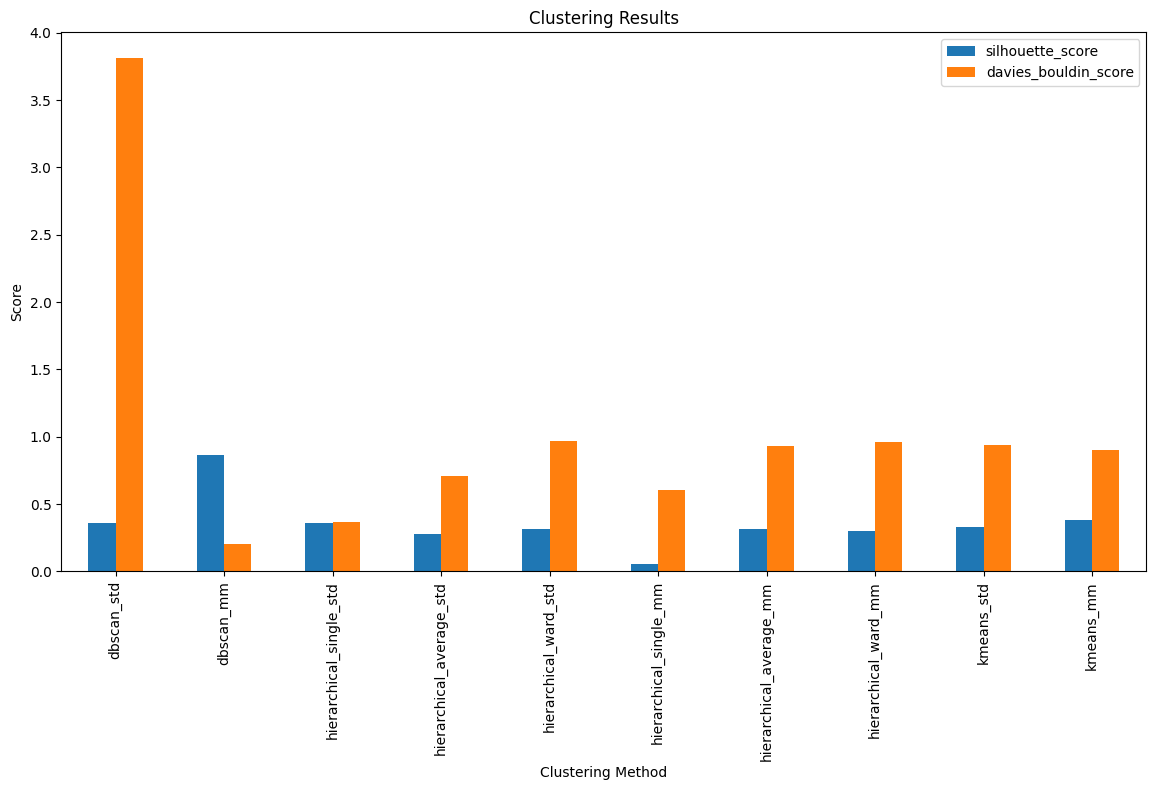

In [75]:


# Sözlükleri birleştir
all_results = {**dbscan_results, **hierarchical_results, **kmeans_results}

# DataFrame oluştur
results_df = pd.DataFrame(all_results).T
print(results_df)

# DataFrame'i çizim için hazırla
results_df.plot(kind='bar', figsize=(14, 7), title='Clustering Results')
plt.ylabel('Score')
plt.xlabel('Clustering Method')
plt.legend(loc='upper right')
plt.show()


### best scores are "dbscan_mm", "hierarchical_single_std", "kmeans_mm"

### because of the low davies_bouldin_score and high silhouette score

### adding the clustering results of models to dataframe

In [80]:


# Sınıfları df_nn veri çerçevesine ekleme
df_nn['dbscan_mm_labels'] = labels_dbscan_mm
df_nn['hierarchical_single_std_labels'] = labels_agglo_single_std
df_nn['kmeans_mm_labels'] = labels_kmeans_mm


df_nn

,gender,residence_type,age,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,smoking_status,dbscan_mm_labels,hierarchical_single_std_labels,kmeans_mm_labels
0,1.0,1.0,24,4,250,139,212,0,108.0,33.0,109.000000,37.999303,0.480277,1,1,1,0,0,2
1,0.0,1.0,29,4,132,187,147,0,202.0,42.0,140.137344,25.588346,0.283986,1,1,2,1,0,1
2,0.0,0.0,46,3,271,185,193,0,149.0,43.0,102.000000,37.892029,2.472309,1,0,0,2,0,1
3,1.0,0.0,73,2,102,200,125,0,105.0,77.0,165.000000,18.660241,1.472052,0,1,1,2,0,1
4,1.0,0.0,49,3,91,163,192,0,162.0,31.0,170.000000,12.767980,0.537627,1,1,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.0,0.0,76,1,117,247,88,1,104.0,22.0,179.000000,42.427361,2.017600,1,0,0,14,0,2
5996,1.0,1.0,51,2,173,297,81,0,208.0,74.0,82.000000,24.093549,1.276717,0,1,0,13,0,0
5997,0.0,1.0,70,2,120,234,111,0,139.0,45.0,86.000000,40.483956,0.646022,0,1,0,24,0,0
5998,0.0,1.0,78,2,131,189,133,1,196.0,83.0,150.000000,24.987071,0.719095,1,0,0,7,0,2


### Clustering Results in DataFrame

In [82]:
hierarchical_summary = df_nn.groupby('hierarchical_single_std_labels').mean()
print("Hierarchical Clusters:\n" )
hierarchical_summary

Hierarchical Clusters:



,gender,residence_type,age,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,smoking_status,dbscan_mm_labels,kmeans_mm_labels
hierarchical_single_std_labels,,,,,,,,,,,,,,,,,,
0,0.499833,0.498666,53.658553,2.518673,134.274592,209.815105,145.00967,0.503168,161.134986,59.910226,129.537011,29.940600,1.294711,0.501334,0.498333,0.623208,12.724408,1.064188
1,0.000000,0.000000,18.000000,2.000000,163.000000,300.000000,76.00000,0.000000,97.000000,98.000000,177.000000,45.019669,0.159849,0.000000,0.000000,0.000000,27.000000,0.000000
2,1.000000,1.000000,85.000000,2.000000,121.000000,297.000000,132.00000,1.000000,93.000000,24.000000,84.000000,20.232517,1.900827,1.000000,0.000000,0.000000,10.000000,2.000000


In [83]:
cluster_summary = df_nn.groupby('kmeans_mm_labels').mean()
print("K-Means Clusters:\n")
cluster_summary

K-Means Clusters:



,gender,residence_type,age,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,smoking_status,dbscan_mm_labels,hierarchical_single_std_labels
kmeans_mm_labels,,,,,,,,,,,,,,,,,,
0,0.407606,0.590787,54.256561,2.524371,133.683985,208.408677,144.119979,0.305838,159.545577,59.855387,129.486032,29.894289,1.288322,0.089984,0.185860,0.620782,17.969470,0.000536
1,0.290803,0.102605,53.569378,2.499203,134.533227,208.334928,144.673046,0.293993,162.491524,60.291633,129.579739,29.975588,1.302483,0.703881,0.709729,0.622541,7.940457,0.000000
2,0.750888,0.753108,53.235346,2.529751,134.555062,212.296181,145.992007,0.841474,161.260878,59.638084,129.544442,29.952153,1.293282,0.673179,0.580373,0.625222,12.376998,0.000888
